<a href="https://colab.research.google.com/github/hucarlos08/Geo-ML-AT/blob/main/MCMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Markov Chain Monte Carlo (MCMC)

Markov Chain Monte Carlo (MCMC) is a powerful statistical method used for estimating the distribution of a parameter of interest by constructing a Markov chain that has the desired distribution as its equilibrium distribution. It has become an indispensable tool in various fields such as physics, biology, finance, and, most notably, in Bayesian statistics.

### Background

The essence of Bayesian statistics is the combination of prior beliefs with observed data to produce a posterior distribution. However, as models grow in complexity, it becomes challenging to obtain an analytical solution for the posterior distribution. This is where MCMC comes into play.

### What is MCMC?

MCMC is a class of algorithms that use simulation to estimate complex distributions (like the posterior distribution in Bayesian statistics). The name "Markov Chain Monte Carlo" has three components:

1. **Markov Chain**: A sequence of random variables where the future state depends only on the current state and not on the sequence of states that preceded it.
2. **Monte Carlo**: Refers to the use of randomness or random sampling in the algorithm.
3. **MCMC**: Combines the concepts of Markov chains and Monte Carlo to produce a sequence of samples from the desired distribution.

### Why is MCMC Important?

1. **Flexibility**: MCMC can be applied to a wide variety of statistical models.
2. **Convergence**: Given certain conditions, the Markov chain will converge to the target distribution, regardless of the starting point.
3. **Power**: Even when direct sampling is difficult or impossible, MCMC can produce samples from the desired distribution.

### Challenges with MCMC

Like all methods, MCMC is not without its challenges:

1. **Tuning**: MCMC algorithms often have parameters that need to be tuned to ensure efficient sampling.
2. **Convergence**: While the Markov chain will converge given certain conditions, in practice, it can be challenging to determine when this convergence has occurred.
3. **Correlation**: Successive samples from the Markov chain can be correlated, which can reduce the efficiency of the algorithm.

## Metropolis-Hastings Algorithm

The Metropolis-Hastings (MH) algorithm is one of the earliest and most fundamental MCMC methods. It's designed to simulate samples from a target distribution by constructing a Markov chain that will have the target distribution as its equilibrium distribution. The algorithm achieves this by proposing moves to new points in the state space and then deciding whether to accept or reject these moves based on a carefully designed criterion.

### The posterior $p^∗(\mathbf x)\propto p(\mathbf x|D)$

A crucial aspect of the MH algorithm revolves around the target distribution $p(\mathbf x)$. Is it a distribution we fully know? The answer is nuanced.

The distribution $p(\mathbf x)$ represents the target distribution from which we aim to sample. In many applications, especially in Bayesian statistics, we do not know the complete form of $p(\mathbf x)$. However, we often are familiar with a function proportional to it.

For instance, in Bayesian statistics, $p(\mathbf x)$ would denote the posterior distribution, which is **proportional to the product of the likelihood and the prior distribution**. Often, we can't compute the posterior distribution directly due to a complex denominator (the evidence), but we can evaluate it for any $\mathbf x$ up to a proportionality constant.

In essence:

- We frequently know a function proportional to $p(\mathbf x)$ but not the complete distribution itself.
- We don't need to know the full distribution $p(\mathbf x)$ to employ the Metropolis-Hastings algorithm. We only need the ability to evaluate $p(\mathbf x)$ up to a proportionality constant.

This adaptability is one of the primary advantages of the Metropolis-Hastings algorithm and many other MCMC methods: they enable sampling from distributions that we can't compute directly.


### Description of the Algorithm:

1. **Initialization**: Start with an initial point $\mathbf x_0$ and set $t = 0$.

2. **Proposal Distribution**: At each step $t$, propose a new point $\mathbf x'$ using a proposal distribution $q(\mathbf x' | \mathbf x_t)$. This distribution can be anything that suggests a new point given the current one, such as a normal distribution centered at $\mathbf x_t$.

3. **Acceptance Criterion**: Calculate the acceptance ratio $\alpha$ which is given by:

$$
\alpha = \frac{p(\mathbf x')q(\mathbf x_t | \mathbf x')}{p(\mathbf x_t)q(\mathbf x' | \mathbf x_t)}
$$

Where $p(\mathbf x)$ is the target distribution we want to sample from.

4. **Decision**:
   - Generate a random number $u$ from a uniform distribution between 0 and 1.
   - If $u < \min(1, r) $, then accept $\mathbf x'$ as the new sample: $\mathbf x_{t+1} = \mathbf x'$.
   - Otherwise, stay at the current point: $\mathbf x_{t+1} = \mathbf x_t $.

5. **Iteration**: Increase $t$ by 1 and return to step 2.

The above steps are repeated for a specified number of iterations or until the chain converges to the target distribution.

### Key Features:

- The choice of the proposal distribution $q$ is crucial. A poor choice can lead to slow convergence or even non-convergence of the chain.
  
- The Metropolis-Hastings algorithm is versatile and can be applied to high-dimensional distributions.

- The acceptance criterion ensures that the samples generated by the algorithm will converge to the target distribution $p^*$.

### Intuition:

The algorithm uses the proposal distribution to explore the state space and the acceptance criterion to correct any bias introduced by the proposal. The acceptance ratio $\alpha$ balances the likelihood of the proposed point under the target distribution against the likelihood of the current point and the probabilities of proposing each point from the other.

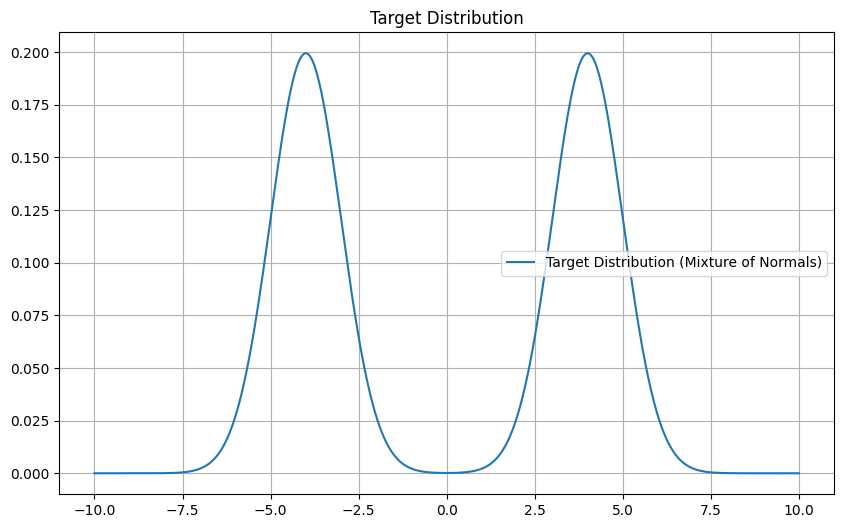

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Definir la distribución objetivo (una mezcla de dos normales)
def target_distribution(x):
    return 0.5 * norm.pdf(x, -4, 1) + 0.5 * norm.pdf(x, 4, 1)

# Visualizar la distribución objetivo
x = np.linspace(-10, 10, 1000)
y = target_distribution(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Target Distribution (Mixture of Normals)")
plt.title("Target Distribution")
plt.legend()
plt.grid(True)
plt.show()


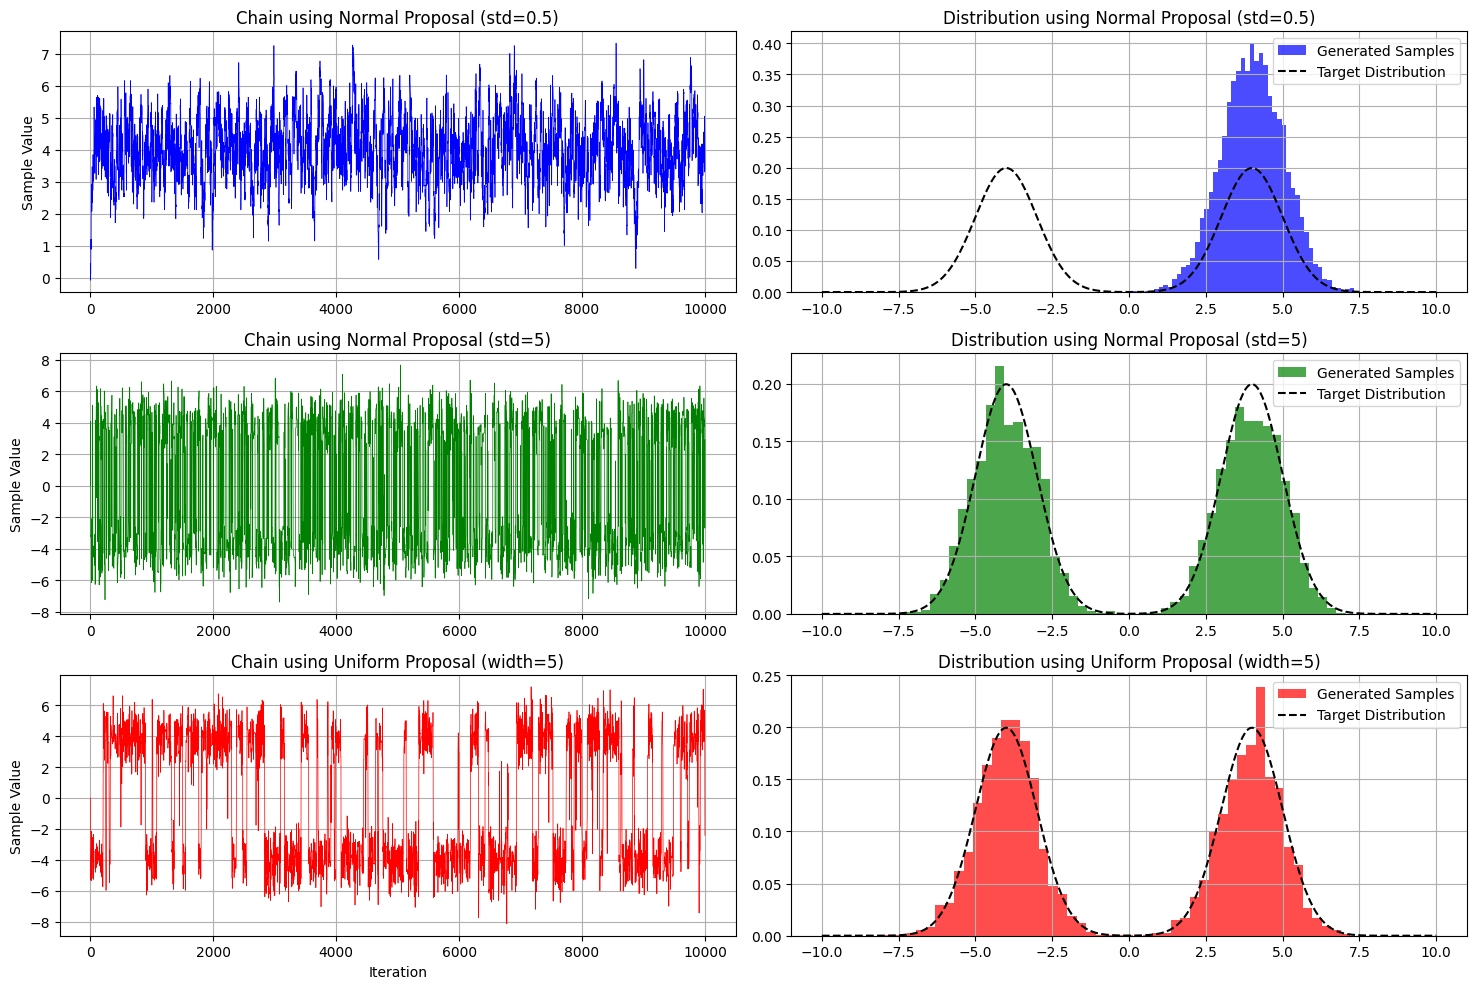

In [ ]:
def metropolis_hastings(target_dist, proposal_dist, proposal_std, init_value, n_samples):
    """
    Implementación del algoritmo Metropolis-Hastings.

    Parámetros:
    - target_dist: la distribución objetivo que queremos muestrear.
    - proposal_dist: la función de propuesta (norm o uniform).
    - proposal_std: la desviación estándar o el ancho de la distribución de propuesta.
    - init_value: valor inicial para comenzar el muestreo.
    - n_samples: número de muestras a generar.
    """
    current_value = init_value
    samples = [current_value]

    for _ in range(n_samples):
        # Generar propuesta
        if proposal_dist == "norm":
            proposed_value = np.random.normal(current_value, proposal_std)
        elif proposal_dist == "uniform":
            proposed_value = np.random.uniform(current_value - proposal_std, current_value + proposal_std)

        # Calcular la razón de aceptación
        acceptance_ratio = target_dist(proposed_value) / target_dist(current_value)

        # Aceptar o rechazar la propuesta
        if np.random.rand() < acceptance_ratio:
            current_value = proposed_value

        samples.append(current_value)

    return samples

# Parámetros
n_samples = 10000
init_value = 0

# Generar muestras usando diferentes distribuciones de propuesta
samples_small_norm = metropolis_hastings(target_distribution, "norm", 0.5, init_value, n_samples)
samples_large_norm = metropolis_hastings(target_distribution, "norm", 5, init_value, n_samples)
samples_uniform = metropolis_hastings(target_distribution, "uniform", 5, init_value, n_samples)

samples_small_norm[:10], samples_large_norm[:10], samples_uniform[:10]  # Mostrar los primeros 10 valores de cada cadena

# Visualizar las cadenas generadas y las distribuciones resultantes
plt.figure(figsize=(15, 10))

# Cadenas generadas
plt.subplot(3, 2, 1)
plt.plot(samples_small_norm, color="blue", lw=0.5)
plt.title("Chain using Normal Proposal (std=0.5)")
plt.ylabel("Sample Value")
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(samples_large_norm, color="green", lw=0.5)
plt.title("Chain using Normal Proposal (std=5)")
plt.ylabel("Sample Value")
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(samples_uniform, color="red", lw=0.5)
plt.title("Chain using Uniform Proposal (width=5)")
plt.ylabel("Sample Value")
plt.xlabel("Iteration")
plt.grid(True)

# Distribuciones resultantes
plt.subplot(3, 2, 2)
plt.hist(samples_small_norm, bins=50, density=True, color="blue", alpha=0.7, label="Generated Samples")
plt.plot(x, y, 'k--', label="Target Distribution")
plt.title("Distribution using Normal Proposal (std=0.5)")
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 4)
plt.hist(samples_large_norm, bins=50, density=True, color="green", alpha=0.7, label="Generated Samples")
plt.plot(x, y, 'k--', label="Target Distribution")
plt.title("Distribution using Normal Proposal (std=5)")
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 6)
plt.hist(samples_uniform, bins=50, density=True, color="red", alpha=0.7, label="Generated Samples")
plt.plot(x, y, 'k--', label="Target Distribution")
plt.title("Distribution using Uniform Proposal (width=5)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Random Walk Metropolis (RWM) Algorithm

The RWM algorithm is a specific type of Metropolis-Hastings sampler where the proposal distribution is symmetric and centered around the current value. This means that the proposed move is determined by adding a random "step" to the current position, making it resemble a random walk.

#### How It Works:

1. **Initialization:** Start with an initial point in the parameter space.
2. **Proposal Generation:** At each step, generate a candidate for the next point in the chain by adding a random step to the current point. This step is often drawn from a symmetric distribution, like a normal distribution centered at zero.
3. **Acceptance or Rejection:** The candidate is accepted with a probability determined by the ratio of the target distribution's values at the proposed and current points. If the candidate is rejected, the next point in the chain remains the same as the current point.

#### Acceptance Ratio:

Given that the proposal distribution is symmetric, the acceptance ratio $\alpha$n the RWM simplifies compared to the general Metropolis-Hastings version. It is given by:

$$
\alpha(\mathbf x, \mathbf x') = \min \left( 1, \frac{p(\mathbf x')}{p(\mathbf x)} \right)
$$

Where:
- $p(\mathbf x)$ is the density of the target distribution at point $x$.
- $\mathbf x$ is the current point in the chain.
- $\mathbf x'$ is the proposed point.

#### Advantages:

1. **Simplicity:** The RWM algorithm is conceptually straightforward, especially due to its symmetric proposal distribution.
2. **Adaptability:** By adjusting the variance of the random step (e.g., the variance of the normal distribution from which the step is drawn), one can control the balance between local exploration and global exploration.

#### Challenges:

1. **Choice of Step Size:** The efficiency of the RWM largely depends on the step size. A small step size may lead to slow exploration and slow convergence, while a large step size may lead to many rejected proposals.
2. **Curse of Dimensionality:** Like other MCMC methods, the RWM can become less efficient in high-dimensional spaces. As the dimensionality increases, choosing an appropriate step size becomes more challenging.

### Applications:

The RWM algorithm is often used as a foundational MCMC method due to its simplicity. It's especially useful for problems where the parameter space's structure is not well known in advance, and a basic sampling strategy is required.


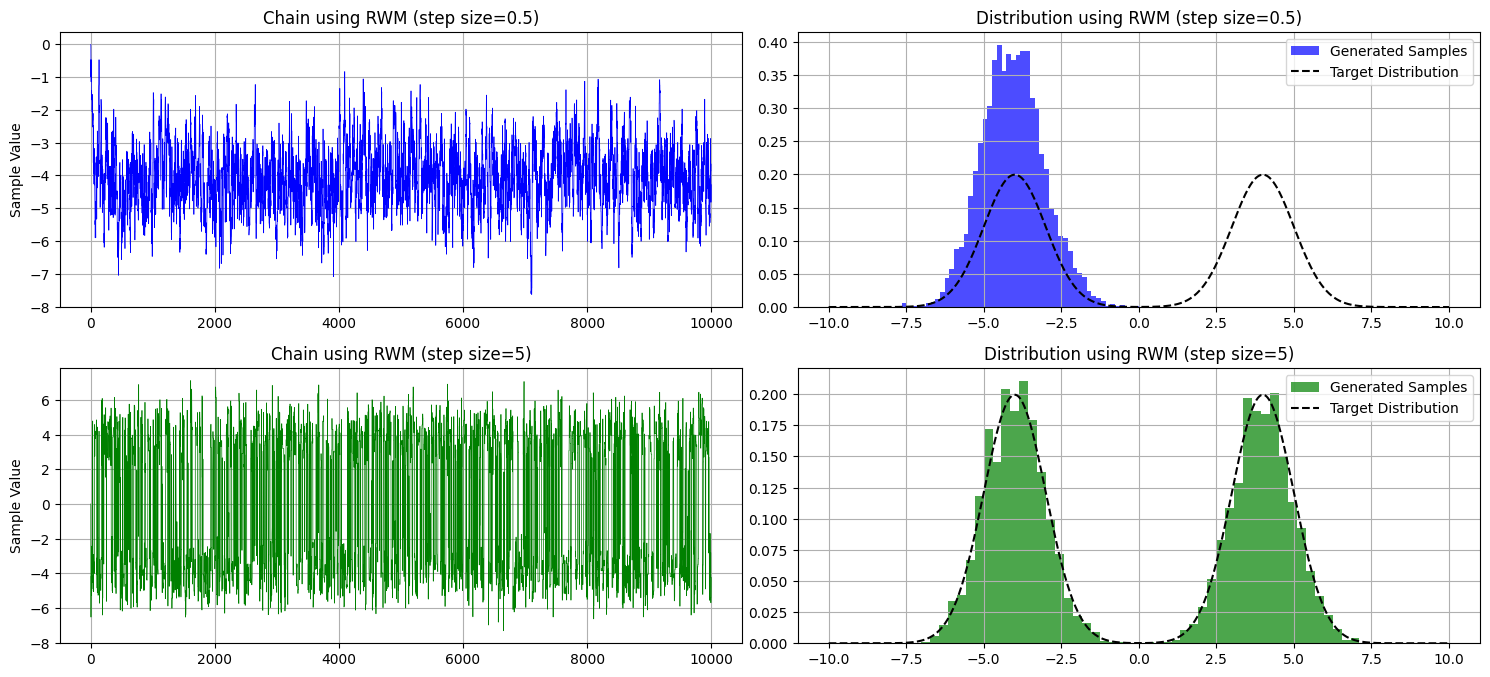

In [ ]:
# Importing necessary libraries
import numpy as np
from scipy.stats import norm

def random_walk_metropolis(target_dist, step_size, init_value, n_samples):
    """
    Implementation of the Random Walk Metropolis algorithm.

    Parameters:
    - target_dist: the target distribution we want to sample from.
    - step_size: the standard deviation of the normal distribution from which the step is drawn.
    - init_value: initial value to start the sampling.
    - n_samples: number of samples to generate.
    """
    current_value = init_value
    samples = [current_value]

    for _ in range(n_samples):
        # Generate proposal by adding a random step to the current value
        proposed_value = current_value + np.random.normal(0, step_size)

        # Calculate the acceptance ratio
        acceptance_ratio = target_dist(proposed_value) / target_dist(current_value)

        # Accept or reject the proposal
        if np.random.rand() < acceptance_ratio:
            current_value = proposed_value

        samples.append(current_value)

    return samples

# Generate samples using different step sizes for the RWM algorithm
samples_small_step = random_walk_metropolis(target_distribution, 0.5, init_value, n_samples)
samples_large_step = random_walk_metropolis(target_distribution, 5, init_value, n_samples)

samples_small_step[:10], samples_large_step[:10]  # Display the first 10 values of each chain

# Visualizing the chains and resulting distributions from RWM

# Define x values for visualization of target distribution
x = np.linspace(-10, 10, 1000)
y = target_distribution(x)

plt.figure(figsize=(15, 10))

# Chains
plt.subplot(3, 2, 1)
plt.plot(samples_small_step, color="blue", lw=0.5)
plt.title("Chain using RWM (step size=0.5)")
plt.ylabel("Sample Value")
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(samples_large_step, color="green", lw=0.5)
plt.title("Chain using RWM (step size=5)")
plt.ylabel("Sample Value")
plt.grid(True)

# Resulting distributions
plt.subplot(3, 2, 2)
plt.hist(samples_small_step, bins=50, density=True, color="blue", alpha=0.7, label="Generated Samples")
plt.plot(x, y, 'k--', label="Target Distribution")
plt.title("Distribution using RWM (step size=0.5)")
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 4)
plt.hist(samples_large_step, bins=50, density=True, color="green", alpha=0.7, label="Generated Samples")
plt.plot(x, y, 'k--', label="Target Distribution")
plt.title("Distribution using RWM (step size=5)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Composing Proposals: Mixture Proposals

A mixture proposal is essentially a combination of multiple base proposal distributions. The idea is to sample a proposal from one of the base proposals based on certain probabilities.

#### Mathematical Formulation:

Given a set of base proposal distributions $ q_1(\mathbf x), q_2(\mathbf x), \ldots, q_k(\mathbf x) $, a mixture proposal $q(\mathbf x)$ is given by:

$$
q(\mathbf x) = \sum_{i=1}^{k} w_i \cdot q_i(\mathbf x)
$$

where:
- $w_i$ are the mixture weights, with $\sum_{i=1}^{k} w_i = 1$.
- $q_i(\mathbf x)$ are the base proposal distributions.

#### How It Works:

1. **Choose a Base Proposal:** At each step, first decide which base proposal distribution to use. This decision is made based on the mixture weights $w_i$. For example, you might select $q_1(\mathbf x)$ with probability $w_1$, $q_2(\mathbf x)$ with probability $w_2$, and so on.
2. **Generate a Proposal:** Once a base proposal is chosen, generate a proposal from that distribution.
3. **Acceptance or Rejection:** As in the standard Metropolis-Hastings algorithm, decide whether to accept or reject the proposal based on the target distribution and the proposal distribution.

#### Advantages:

1. **Flexibility:** Mixture proposals provide flexibility in exploring different regions of the parameter space. For example, one proposal might be good for local exploration, while another might be suited for jumping to distant regions.
2. **Efficiency:** Combining proposals can lead to faster convergence and better mixing of the Markov chain, especially if the base proposals complement each other's strengths and weaknesses.

#### Challenges:

1. **Choosing Weights:** Deciding on the mixture weights $w_i$ is crucial. Poorly chosen weights can lead to inefficiencies.
2. **Increased Complexity:** Implementing and tuning a mixture proposal can be more complex than using a single proposal distribution.

#### Practical Tip:

When using mixture proposals, it's often beneficial to start with two or three base proposals that have complementary characteristics. For instance, a narrow Gaussian might be useful for fine-tuning around a mode, while a wider Gaussian or uniform distribution might help in exploring distant regions of the space.

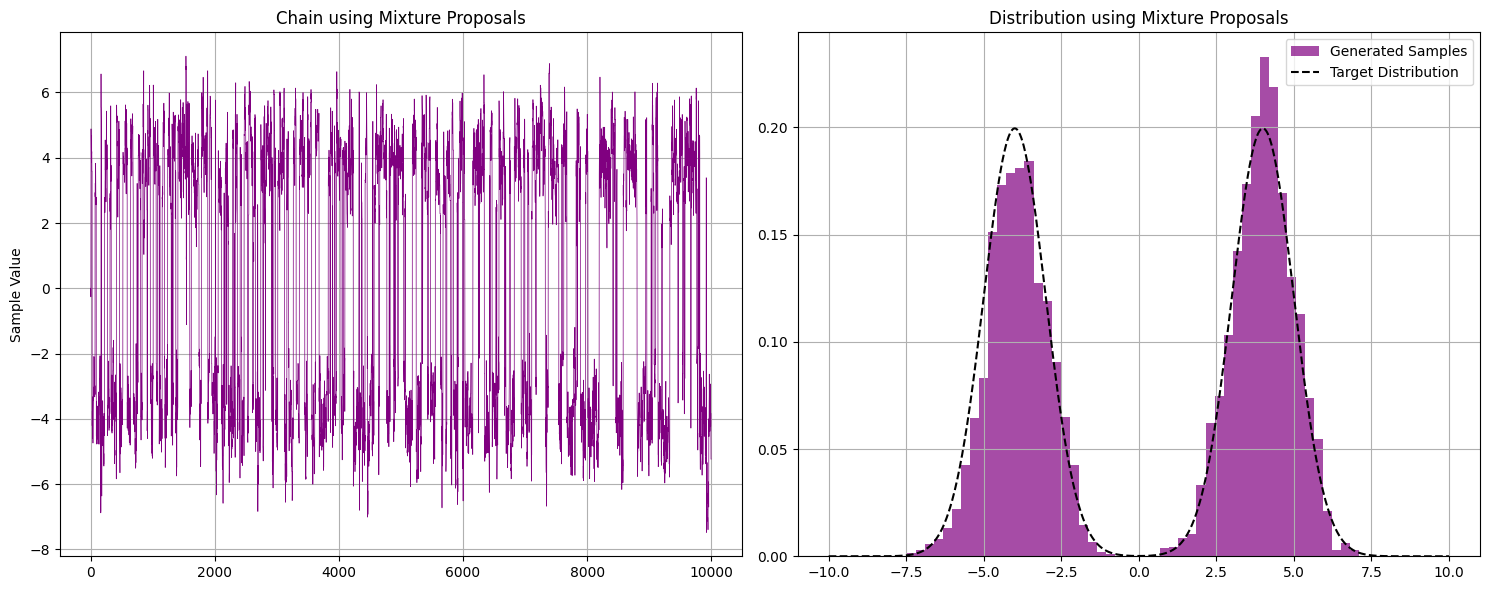

In [ ]:
def metropolis_hastings_mixture(target_dist, proposal_dists, proposal_weights, init_value, n_samples):
    """
    Implementation of the Metropolis-Hastings algorithm using mixture proposals.

    Parameters:
    - target_dist: the target distribution we want to sample from.
    - proposal_dists: a list of proposal distributions (functions).
    - proposal_weights: the weights for each proposal distribution.
    - init_value: initial value to start the sampling.
    - n_samples: number of samples to generate.
    """
    current_value = init_value
    samples = [current_value]

    for _ in range(n_samples):
        # Choose a proposal distribution based on the provided weights
        chosen_proposal = np.random.choice(proposal_dists, p=proposal_weights)

        # Generate proposal from the chosen proposal distribution
        proposed_value = current_value + chosen_proposal()

        # Calculate the acceptance ratio
        acceptance_ratio = min(1, target_dist(proposed_value) / target_dist(current_value))

        # Accept or reject the proposal
        if np.random.rand() < acceptance_ratio:
            current_value = proposed_value

        samples.append(current_value)

    return samples

# Define two proposal distributions: one for local exploration and one for bigger jumps
proposal_small_step = lambda: np.random.normal(0, 0.5)
proposal_large_step = lambda: np.random.normal(0, 5)

# Mixture weights
weights = [0.7, 0.3]  # 70% chance to choose the small step proposal, 30% for the large step proposal

# Generate samples using the Metropolis-Hastings with mixture proposals
samples_mixture = metropolis_hastings_mixture(target_distribution, [proposal_small_step, proposal_large_step], weights, init_value, n_samples)

# Visualizing the chain and resulting distribution
plt.figure(figsize=(15, 6))

# Chain
plt.subplot(1, 2, 1)
plt.plot(samples_mixture, color="purple", lw=0.5)
plt.title("Chain using Mixture Proposals")
plt.ylabel("Sample Value")
plt.grid(True)

# Resulting distribution
plt.subplot(1, 2, 2)
plt.hist(samples_mixture, bins=50, density=True, color="purple", alpha=0.7, label="Generated Samples")
plt.plot(x, y, 'k--', label="Target Distribution")
plt.title("Distribution using Mixture Proposals")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Detailed Balance

For a Markov chain to have a stationary distribution $p^*$, it must satisfy the detailed balance condition:

$$
p(x) \cdot T(x \rightarrow x') = p(x') \cdot T(x' \rightarrow x)
$$

Here, $p$ is the stationary distribution, and $T$ is the transition matrix of the Markov chain. This principle ensures that, on average, the rate at which the chain moves from state $x$ to state $x'$ is the same as the rate it moves from $x'$ to $x$.

### Decomposition of the Transition Matrix

In MH, the transition matrix $T(x \rightarrow x')$ is broken down into two parts:

1. **Probability of proposing a move:** $Q(x \rightarrow x')$
2. **Probability of accepting the proposed move:** $A(x \rightarrow x')$

Thus,

$$
T(x \rightarrow x') = Q(x \rightarrow x') \cdot A(x \rightarrow x')
$$

### Acceptance in MH

The acceptance rule in MH is specifically designed to satisfy detailed balance. The probability of accepting a proposed move from $x$ to $x'$ is defined as:

$$
A(x \rightarrow x') = \min \left(1, \frac{p^*(x') \cdot Q(x' \rightarrow x)}{p^*(x) \cdot Q(x \rightarrow x')} \right)
$$

Where $p^*$ is the target distribution.

### Proving Detailed Balance in MH

To prove that MH satisfies detailed balance, consider two cases:

**Case 1:** $p^*(x') \cdot Q(x' \rightarrow x) \geq p^*(x) \cdot Q(x \rightarrow x')$

The acceptance probability is:

$$
A(x \rightarrow x') = 1
$$

Thus:

$$
p(x) \cdot T(x \rightarrow x') = p(x) \cdot Q(x \rightarrow x') = p^*(x) \cdot Q(x \rightarrow x')
$$

and

$$
p(x') \cdot T(x' \rightarrow x) = p^*(x') \cdot Q(x' \rightarrow x)
$$

Both are equal, so detailed balance is satisfied.

**Case 2:** $p^*(x') \cdot Q(x' \rightarrow x) < p^*(x) \cdot Q(x \rightarrow x')$

The acceptance probability is:

$$
A(x \rightarrow x') = \frac{p^*(x') \cdot Q(x' \rightarrow x)}{p^*(x) \cdot Q(x \rightarrow x')}
$$

Thus:

$$
p(x) \cdot T(x \rightarrow x') = p^*(x) \cdot Q(x \rightarrow x') \cdot \frac{p^*(x') \cdot Q(x' \rightarrow x)}{p^*(x) \cdot Q(x \rightarrow x')}
$$

This again simplifies to:

$$
p(x') \cdot Q(x' \rightarrow x) = p(x') \cdot T(x' \rightarrow x)
$$

Hence, in both cases, the detailed balance condition is satisfied.

### Conclusion

The acceptance rule in the MH algorithm is specifically designed to ensure that the Markov chain satisfies the detailed balance condition, which in turn guarantees that $p^*$ is the stationary distribution of the chain. Therefore, as more and more samples are generated, the distribution of the samples will converge to $p^*$.
